Primeiro, importemos algumas bibliotecas úteis:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from statistics import mean

Vamos importar os dados da base adult:

In [2]:
treino_adult = pd.read_csv("/kaggle/input/adult-pmr3508/train_data.csv",
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

teste_adult = pd.read_csv("/kaggle/input/adult-pmr3508/test_data.csv",
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

Y_exemplo = pd.read_csv("/kaggle/input/adult-pmr3508/sample_submission.csv",
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

Vamos ver como são as base de dados:

In [3]:
treino_adult.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
1,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
3,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


In [4]:
treino_adult.shape


(32560, 16)

In [5]:
teste_adult.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0,25,Private,120596,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,44,United-States
1,1,64,State-gov,152537,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
2,2,31,Private,100135,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
3,3,45,Private,189123,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States
4,4,64,Self-emp-inc,487751,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States


In [6]:
teste_adult.shape

(16280, 15)

Vamos produzir um histograma da variável idade, dessa forma podemos buscar por outliers ou analisar possíveis más distribuições de dados.

(array([2410., 3160., 2461., 3429., 3465., 2583., 3197., 2965., 1828.,
        2139., 1558., 1033.,  996.,  599.,  269.,  227.,  120.,   54.,
          20.,   47.]),
 array([17.  , 20.65, 24.3 , 27.95, 31.6 , 35.25, 38.9 , 42.55, 46.2 ,
        49.85, 53.5 , 57.15, 60.8 , 64.45, 68.1 , 71.75, 75.4 , 79.05,
        82.7 , 86.35, 90.  ]),
 <BarContainer object of 20 artists>)

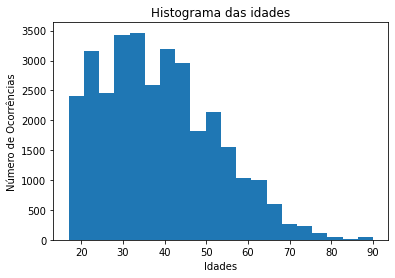

In [7]:
plt.xlabel('Idades')
plt.ylabel('Número de Ocorrências')
plt.title('Histograma das idades')
plt.hist(treino_adult["age"],20)

Não há nenhum dado absurdo, como uma idade de 150 ou negativa. Contudo, há maior incidência de menores idades, isso causará impacto nos resultados, pois alguns estudos correlacionam maior experiência no mercado de trabalho com maiores salários. A distribuição encontrada dialoga bem com a estrutura etária da população de países desenvolvidos nos anos 90 e parece correta.

Agora vamos analisar o número de anos de estudo e, novamente, procurar possíveis erros:

(array([   51.,   168.,   333.,   646.,   514.,   933.,  1175.,   433.,
        10501.,  7291.,  1382.,  1067.,  5354.,  1723.,   576.,   413.]),
 array([ 1.    ,  1.9375,  2.875 ,  3.8125,  4.75  ,  5.6875,  6.625 ,
         7.5625,  8.5   ,  9.4375, 10.375 , 11.3125, 12.25  , 13.1875,
        14.125 , 15.0625, 16.    ]),
 <BarContainer object of 16 artists>)

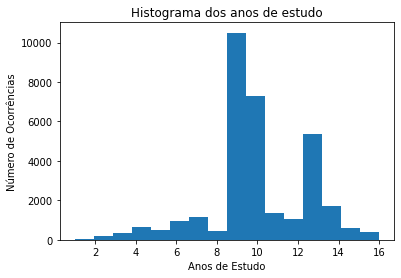

In [8]:
plt.xlabel('Anos de Estudo')
plt.ylabel('Número de Ocorrências')
plt.title('Histograma dos anos de estudo')
plt.hist(treino_adult["education.num"],16)

Vemos uma clara tendência a maiores anos de estudo, isso é esperado em países desenvolvidos, assim há bem maior número de pessoas com 9 ou mais anos de estudo.

Agora vamos analisar os dados concernentes a horas trabalhadas por semana, uma visão preliminar da tabela parece indicar maior tendência a 40 horas semanais.

(array([  205.,   531.,   645.,  1547.,  1015.,  1302.,  1635., 16099.,
         2442.,   677.,  3036.,   841.,  1519.,   277.,   365.,    83.,
          182.,    20.,    34.,   105.]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ,
        54.9, 59.8, 64.7, 69.6, 74.5, 79.4, 84.3, 89.2, 94.1, 99. ]),
 <BarContainer object of 20 artists>)

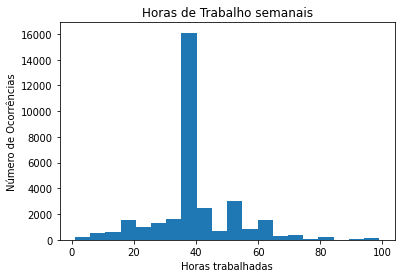

In [9]:
plt.xlabel('Horas trabalhadas')
plt.ylabel('Número de Ocorrências')
plt.title('Horas de Trabalho semanais')
plt.hist(treino_adult["hours.per.week"],20)

Existem alguns dados um pouco estranhos, com um indivíduo trabalhando quase 100 h semanais, vamos ver esse dado mais de perto.

In [10]:
max(treino_adult["hours.per.week"])

99

Apesar de estranho, esse dado não pode ser considerado um outlier, pois é, de fato, possível trabalhar 99 h semanais, dessa forma não retirarei tal dado.

Vamos passar a engenharia de dados. Primeiro com o país:

In [11]:
treino_adult["native.country"].value_counts()

United-States                 29169
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

Precisamos tentar quantificar quanto seu país de origem influencia na sua renda. Podemos fazer uma divisão baseada em países parecidos aos Estados Unidos e países mais distintos, em relação à renda. Ou seja, unirei os dados relativos à United-States, Germany, Canada, England, Italy, Japan, Portugal, France, Ireland, Hong, Outlying-US, Scotland e Holand-Netherlands, aos quais atribuirei valor 1 e aos outros atribuirei valor 0, inclusive caso não se saiba o país de origem. A ideia seria dividir os países entre desenvolvidos e em desenvolvimento.

Primeiro façamos isso para a base de treino:

In [12]:
n=0
for x in treino_adult["native.country"]:
    if x in {'United-States', 'Germany', 'Canada', 'England', 'Italy', 'Japan', 'Portugal', 'France', 'Ireland', 'Hong','Outlying-US(Guam-USVI-etc)', 'Scotland','Holand-Netherlands'}:
        treino_adult['native.country'][n] = 1
    else:
        treino_adult['native.country'][n] = 0
    n=n+1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
treino_adult.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,1,<=50K
1,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,1,<=50K
2,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,1,<=50K
3,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,1,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,0,>50K


A seguir façamos o mesmo processo para a base de teste:

In [14]:
n=0
for x in teste_adult["native.country"]:
    if x in {'United-States', 'Germany', 'Canada', 'England', 'Italy', 'Japan', 'Portugal', 'France', 'Ireland', 'Hong','Outlying-US(Guam-USVI-etc)', 'Scotland','Holand-Netherlands'}:
        teste_adult['native.country'][n] = 1
    else:
        teste_adult['native.country'][n] = 0
    n=n+1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
teste_adult.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0,25,Private,120596,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,44,1
1,1,64,State-gov,152537,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,1
2,2,31,Private,100135,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,1
3,3,45,Private,189123,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,1
4,4,64,Self-emp-inc,487751,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,1


Vamos analisar as possibilidades da variável 'race':

In [16]:
treino_adult["race"].value_counts()

White                 27815
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

Agora analisemos a saída da variável 'sex':

In [17]:
treino_adult["sex"].value_counts()

Male      21789
Female    10771
Name: sex, dtype: int64

Vamos substituir os valores Male por 0 e Female por 1:

Primeiro na base de treino:

In [18]:
n=0
for x in treino_adult["sex"]:
    if x == 'Male':
        treino_adult["sex"][n] = 0
    else:
        treino_adult["sex"][n] = 1
    n=n+1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Agora na base de teste:

In [19]:
n=0
for x in teste_adult["sex"]:
    if x == 'Male':
        teste_adult["sex"][n] = 0
    else:
        teste_adult["sex"][n] = 1
    n=n+1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Vamos observar se está tudo correto nas bases:

In [20]:
treino_adult.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,0,0,0,44,1,<=50K
1,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,0,0,0,40,1,<=50K
2,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,0,0,0,42,1,<=50K
3,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,1,0,0,40,1,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,0,5178,0,60,0,>50K


In [21]:
teste_adult.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0,25,Private,120596,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,0,0,0,44,1
1,1,64,State-gov,152537,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,45,1
2,2,31,Private,100135,Masters,14,Divorced,Exec-managerial,Not-in-family,White,1,0,0,40,1
3,3,45,Private,189123,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,0,0,0,40,1
4,4,64,Self-emp-inc,487751,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,50,1


Tudo parece certo. Agora vamos nos preocupar com a distribuição em relação ao estado civil:

In [22]:
treino_adult['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

Usando o bom-senso tentarei trabalhar com os dados de estado civil. Podemos começar pensando que os estados divorciado e separado são em algum nível equivalentes. O divórcio pode ter impacto na renda, na forma de algum tipo de pensão, ou algo do gênero. Podemos pensar no fato que pessoas casadas tem maior tendência a ter filhos, e dado que esses causam um gasto considerável, há maior pressão por rendas maiores. Dessa forma atribuirei valor 1 para os estados 'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse', valor 0.5 para os estado 'Never-married' e valor 0 para todos outros estados. Pode parecer estranhos juntar divorciado e viúvo, por exemplo. No entanto, a maioria dos viúvos é formada por idosos, que tem menor renda, que é o que suponho ocorrer no caso de divórcio ou separação.

In [23]:
n=0
for x in treino_adult["marital.status"]:
    if x in {'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'}:
        treino_adult["marital.status"][n] = 1
    elif x == 'Never-married':
        treino_adult["marital.status"][n] = 0.5
    else:
        treino_adult["marital.status"][n] = 0
    n=n+1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
n=0
for x in teste_adult["marital.status"]:
    if x in {'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'}:
        teste_adult["marital.status"][n] = 1
    elif x == 'Never-married':
        teste_adult["marital.status"][n] = 0.5
    else:
        teste_adult["marital.status"][n] = 0
    n=n+1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Vamos observar se o processo foi correto:

In [25]:
treino_adult.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,16280,34,Private,204991,Some-college,10,0,Exec-managerial,Own-child,White,0,0,0,44,1,<=50K
1,16281,58,Local-gov,310085,10th,6,1,Transport-moving,Husband,White,0,0,0,40,1,<=50K
2,16282,25,Private,146117,Some-college,10,0.5,Machine-op-inspct,Not-in-family,White,0,0,0,42,1,<=50K
3,16283,24,Private,138938,Some-college,10,0,Adm-clerical,Not-in-family,White,1,0,0,40,1,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,1,Transport-moving,Husband,White,0,5178,0,60,0,>50K


In [26]:
teste_adult.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0,25,Private,120596,Bachelors,13,0.5,Prof-specialty,Not-in-family,White,0,0,0,44,1
1,1,64,State-gov,152537,Bachelors,13,1,Exec-managerial,Husband,White,0,0,0,45,1
2,2,31,Private,100135,Masters,14,0,Exec-managerial,Not-in-family,White,1,0,0,40,1
3,3,45,Private,189123,HS-grad,9,0.5,Machine-op-inspct,Own-child,White,0,0,0,40,1
4,4,64,Self-emp-inc,487751,Bachelors,13,1,Exec-managerial,Husband,White,0,0,0,50,1


Parece tudo certo.

Vamos analisar os dados relacionados a feature 'Workclass'. Primeiro vejamos todas possibilidades:

In [27]:
teste_adult['workclass'].value_counts()

Private             11209
Self-emp-not-inc     1321
Local-gov            1043
State-gov             683
Self-emp-inc          579
Federal-gov           472
Without-pay             7
Never-worked            3
Name: workclass, dtype: int64

Claramente os valores 'without-pay' e 'Never-worked' terão grande impacto na renda anual do indivíduo, vamos agrupá-las com o valor -1, pois é de se esperar que tais condições tenham um impacto enorme na renda do indivíduo. Vamos unir os servidores públicos no valor 0 e os privados no valor 0.5, ou seja, atribuiremos 0 para 'Local-gov', 'State-gov' e 'Federal-gov', por fim, vamos atribuir aos empreendedores o valor 1. 

In [28]:
n=0
for x in teste_adult["workclass"]:
    if x in {'Without-pay', 'Never-worked' }:
        teste_adult["workclass"][n] = -1
    elif x in {'Local-gov', 'State-gov', 'Federal-gov'}:
        teste_adult["workclass"][n] = 0
    elif x == 'Private':
        teste_adult["workclass"][n] = 0.5
    else:
        teste_adult["workclass"][n] = 1
    n=n+1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launc

In [29]:
n=0
for x in treino_adult["workclass"]:
    if x in {'Without-pay', 'Never-worked' }:
        treino_adult["workclass"][n] = -1
    elif x in {'Local-gov', 'State-gov', 'Federal-gov'}:
        treino_adult["workclass"][n] = 0
    elif x == 'Private':
        treino_adult["workclass"][n] = 0.5
    else:
        treino_adult["workclass"][n] = 1
    n=n+1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launc

Novamente analisando a saída:

In [30]:
treino_adult.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,16280,34,0.5,204991,Some-college,10,0,Exec-managerial,Own-child,White,0,0,0,44,1,<=50K
1,16281,58,0,310085,10th,6,1,Transport-moving,Husband,White,0,0,0,40,1,<=50K
2,16282,25,0.5,146117,Some-college,10,0.5,Machine-op-inspct,Not-in-family,White,0,0,0,42,1,<=50K
3,16283,24,0.5,138938,Some-college,10,0,Adm-clerical,Not-in-family,White,1,0,0,40,1,<=50K
4,16284,57,1,258883,HS-grad,9,1,Transport-moving,Husband,White,0,5178,0,60,0,>50K


In [31]:
teste_adult.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0,25,0.5,120596,Bachelors,13,0.5,Prof-specialty,Not-in-family,White,0,0,0,44,1
1,1,64,0,152537,Bachelors,13,1,Exec-managerial,Husband,White,0,0,0,45,1
2,2,31,0.5,100135,Masters,14,0,Exec-managerial,Not-in-family,White,1,0,0,40,1
3,3,45,0.5,189123,HS-grad,9,0.5,Machine-op-inspct,Own-child,White,0,0,0,40,1
4,4,64,1,487751,Bachelors,13,1,Exec-managerial,Husband,White,0,0,0,50,1


Vamos analisar a feature 'relationship':

In [32]:
treino_adult['relationship'].value_counts()

Husband           13193
Not-in-family      8304
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

A questão de se a relação familiar impacta a renda é boa. A princípio não utilizarei esses dados, porque não consigo pensar em boas explicações para tanto.

In [33]:
treino_adult['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

A ocupação é claramente muito relevante para a renda, mas para conseguirmos usar essa feature para análises preditivas, precisariamos de dados correlacionando essas profissões e a renda obtida em cada um delas, como a proposta do trabalho é não utilizar dados externos, não usarei essa variável na análise.

Vamos analisar a distribuição das variáveis de ganho e perda de capital através de histogramas:

(array([3.179e+04, 5.170e+02, 8.700e+01, 5.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.590e+02]),
 array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
        69999.3, 79999.2, 89999.1, 99999. ]),
 <BarContainer object of 10 artists>)

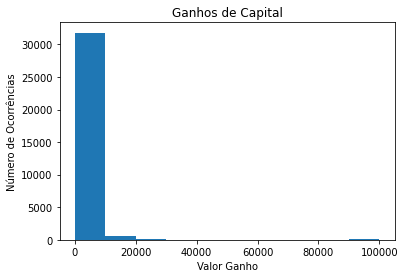

In [34]:
plt.xlabel('Valor Ganho')
plt.ylabel('Número de Ocorrências')
plt.title( 'Ganhos de Capital')
plt.hist(treino_adult["capital.gain"],10)

(array([3.1052e+04, 1.7000e+01, 2.1000e+01, 4.6100e+02, 7.7900e+02,
        2.0700e+02, 1.4000e+01, 0.0000e+00, 6.0000e+00, 3.0000e+00]),
 array([   0. ,  435.6,  871.2, 1306.8, 1742.4, 2178. , 2613.6, 3049.2,
        3484.8, 3920.4, 4356. ]),
 <BarContainer object of 10 artists>)

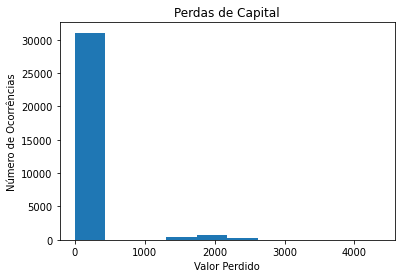

In [35]:
plt.xlabel('Valor Perdido')
plt.ylabel('Número de Ocorrências')
plt.title( 'Perdas de Capital')
plt.hist(treino_adult["capital.loss"],10)

São pouquíssimos dados relevantes sobre ganhos e perdas de capital, dessa forma não utilizarei esses dados na análise, pois só pela normalização, pessoas que tiveram ganhos próximos a 10000 terão um efeito muito pequeno, por exemplo.

Para a variável "Race" criaremos novas colunas com as saídas possíveis, usaremos o processo de one-hot encoding.

In [36]:
R = pd.get_dummies(treino_adult['race'])
G = pd.get_dummies(teste_adult['race'])

In [37]:
treino_adult = pd.concat([treino_adult, R], axis=1).reindex(treino_adult.index)
teste_adult = pd.concat([teste_adult, G], axis=1).reindex(teste_adult.index)

In [38]:
teste_adult

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0,25,0.5,120596,Bachelors,13,0.5,Prof-specialty,Not-in-family,White,0,0,0,44,1,0,0,0,0,1
1,1,64,0,152537,Bachelors,13,1,Exec-managerial,Husband,White,0,0,0,45,1,0,0,0,0,1
2,2,31,0.5,100135,Masters,14,0,Exec-managerial,Not-in-family,White,1,0,0,40,1,0,0,0,0,1
3,3,45,0.5,189123,HS-grad,9,0.5,Machine-op-inspct,Own-child,White,0,0,0,40,1,0,0,0,0,1
4,4,64,1,487751,Bachelors,13,1,Exec-managerial,Husband,White,0,0,0,50,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,16275,40,0.5,168113,HS-grad,9,1,Craft-repair,Husband,White,0,0,0,40,1,0,0,0,0,1
16276,16276,30,0,327203,HS-grad,9,1,Other-service,Husband,White,0,0,0,40,1,0,0,0,0,1
16277,16277,25,0.5,116358,HS-grad,9,0.5,Adm-clerical,Own-child,Asian-Pac-Islander,0,0,0,40,0,0,1,0,0,0
16278,16278,60,0.5,39263,Masters,14,0.5,Exec-managerial,Not-in-family,White,1,3325,0,35,1,0,0,0,0,1


In [39]:
treino_adult

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,...,capital.gain,capital.loss,hours.per.week,native.country,income,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,16280,34,0.5,204991,Some-college,10,0,Exec-managerial,Own-child,White,...,0,0,44,1,<=50K,0,0,0,0,1
1,16281,58,0,310085,10th,6,1,Transport-moving,Husband,White,...,0,0,40,1,<=50K,0,0,0,0,1
2,16282,25,0.5,146117,Some-college,10,0.5,Machine-op-inspct,Not-in-family,White,...,0,0,42,1,<=50K,0,0,0,0,1
3,16283,24,0.5,138938,Some-college,10,0,Adm-clerical,Not-in-family,White,...,0,0,40,1,<=50K,0,0,0,0,1
4,16284,57,1,258883,HS-grad,9,1,Transport-moving,Husband,White,...,5178,0,60,0,>50K,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,48835,42,0.5,384236,Masters,14,1,Prof-specialty,Husband,White,...,7688,0,40,1,>50K,0,0,0,0,1
32556,48836,23,0.5,129042,HS-grad,9,0.5,Machine-op-inspct,Unmarried,Black,...,0,0,40,1,<=50K,0,0,1,0,0
32557,48837,30,0.5,195488,HS-grad,9,0.5,Priv-house-serv,Own-child,White,...,0,0,40,0,<=50K,0,0,0,0,1
32558,48838,18,0.5,27620,HS-grad,9,0.5,Adm-clerical,Not-in-family,White,...,0,0,25,1,<=50K,0,0,0,0,1


O processo deu certo.

Agora vamos nos preocupar com o nível educacional. Contudo, podemos notar que o grau de educação e o número de anos de estudo são variáveis que tem grande correlação, dessa forma não irei usar a coluna "Education" e ficarei apenas com a coluna "Education-Num".

In [40]:
teste_adult.drop('education', axis=1, inplace=True)
treino_adult.drop('education', axis=1, inplace=True)



Como já lidamos com a variável race, podemos tirá-la das bases de dados:

In [41]:
teste_adult.drop('race', axis=1, inplace=True)
treino_adult.drop('race', axis=1, inplace=True)

In [42]:
treino_adult

,Id,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,16280,34,0.5,204991,10,0,Exec-managerial,Own-child,0,0,0,44,1,<=50K,0,0,0,0,1
1,16281,58,0,310085,6,1,Transport-moving,Husband,0,0,0,40,1,<=50K,0,0,0,0,1
2,16282,25,0.5,146117,10,0.5,Machine-op-inspct,Not-in-family,0,0,0,42,1,<=50K,0,0,0,0,1
3,16283,24,0.5,138938,10,0,Adm-clerical,Not-in-family,1,0,0,40,1,<=50K,0,0,0,0,1
4,16284,57,1,258883,9,1,Transport-moving,Husband,0,5178,0,60,0,>50K,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,48835,42,0.5,384236,14,1,Prof-specialty,Husband,0,7688,0,40,1,>50K,0,0,0,0,1
32556,48836,23,0.5,129042,9,0.5,Machine-op-inspct,Unmarried,1,0,0,40,1,<=50K,0,0,1,0,0
32557,48837,30,0.5,195488,9,0.5,Priv-house-serv,Own-child,1,0,0,40,0,<=50K,0,0,0,0,1
32558,48838,18,0.5,27620,9,0.5,Adm-clerical,Not-in-family,1,0,0,25,1,<=50K,0,0,0,0,1


In [43]:
teste_adult

,Id,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0,25,0.5,120596,13,0.5,Prof-specialty,Not-in-family,0,0,0,44,1,0,0,0,0,1
1,1,64,0,152537,13,1,Exec-managerial,Husband,0,0,0,45,1,0,0,0,0,1
2,2,31,0.5,100135,14,0,Exec-managerial,Not-in-family,1,0,0,40,1,0,0,0,0,1
3,3,45,0.5,189123,9,0.5,Machine-op-inspct,Own-child,0,0,0,40,1,0,0,0,0,1
4,4,64,1,487751,13,1,Exec-managerial,Husband,0,0,0,50,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,16275,40,0.5,168113,9,1,Craft-repair,Husband,0,0,0,40,1,0,0,0,0,1
16276,16276,30,0,327203,9,1,Other-service,Husband,0,0,0,40,1,0,0,0,0,1
16277,16277,25,0.5,116358,9,0.5,Adm-clerical,Own-child,0,0,0,40,0,0,1,0,0,0
16278,16278,60,0.5,39263,14,0.5,Exec-managerial,Not-in-family,1,3325,0,35,1,0,0,0,0,1


Passemos a normalizar os dados, primeiro da base de teste:

In [44]:
teste_adult['age'] = (teste_adult['age'] - min(teste_adult['age'])) / (max(teste_adult['age']) - min(teste_adult['age']))
teste_adult['education.num'] = (teste_adult['education.num'] - min(teste_adult['education.num'])) / (max(teste_adult['education.num']) - min(teste_adult['education.num']))
teste_adult['fnlwgt'] = (teste_adult['fnlwgt'] - min(teste_adult['fnlwgt'])) / (max(teste_adult['fnlwgt']) - min(teste_adult['fnlwgt']))
teste_adult['hours.per.week'] = (teste_adult['hours.per.week'] - min(teste_adult['hours.per.week'])) / (max(teste_adult['hours.per.week']) - min(teste_adult['hours.per.week']))


Depois da base de treino:

In [45]:
treino_adult['age'] = (treino_adult['age'] - min(treino_adult['age'])) / (max(treino_adult['age']) - min(treino_adult['age']))
treino_adult['education.num'] = (treino_adult['education.num'] - min(treino_adult['education.num'])) / (max(treino_adult['education.num']) - min(treino_adult['education.num']))
treino_adult['fnlwgt'] = (treino_adult['fnlwgt'] - min(treino_adult['fnlwgt'])) / (max(treino_adult['fnlwgt']) - min(treino_adult['fnlwgt']))
treino_adult['hours.per.week'] = (treino_adult['hours.per.week'] - min(treino_adult['hours.per.week'])) / (max(treino_adult['hours.per.week']) - min(treino_adult['hours.per.week']))


In [46]:
teste_adult

,Id,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0,0.109589,0.5,0.072519,0.800000,0.5,Prof-specialty,Not-in-family,0,0,0,0.438776,1,0,0,0,0,1
1,1,0.643836,0,0.094146,0.800000,1,Exec-managerial,Husband,0,0,0,0.448980,1,0,0,0,0,1
2,2,0.191781,0.5,0.058665,0.866667,0,Exec-managerial,Not-in-family,1,0,0,0.397959,1,0,0,0,0,1
3,3,0.383562,0.5,0.118918,0.533333,0.5,Machine-op-inspct,Own-child,0,0,0,0.397959,1,0,0,0,0,1
4,4,0.643836,1,0.321116,0.800000,1,Exec-managerial,Husband,0,0,0,0.500000,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,16275,0.315068,0.5,0.104692,0.533333,1,Craft-repair,Husband,0,0,0,0.397959,1,0,0,0,0,1
16276,16276,0.178082,0,0.212411,0.533333,1,Other-service,Husband,0,0,0,0.397959,1,0,0,0,0,1
16277,16277,0.109589,0.5,0.069650,0.533333,0.5,Adm-clerical,Own-child,0,0,0,0.397959,0,0,1,0,0,0
16278,16278,0.589041,0.5,0.017449,0.866667,0.5,Exec-managerial,Not-in-family,1,3325,0,0.346939,1,0,0,0,0,1


Vamos excluir as colunas que não usaremos ou que já tratamos:

In [47]:
teste_adult.drop('occupation', axis=1, inplace=True)
teste_adult.drop('relationship', axis=1, inplace=True)
teste_adult.drop('capital.gain', axis=1, inplace=True)
teste_adult.drop('capital.loss', axis=1, inplace=True)
teste_adult.drop('Id', axis=1, inplace = True)

treino_adult.drop('occupation', axis=1, inplace=True)
treino_adult.drop('relationship', axis=1, inplace=True)
treino_adult.drop('capital.gain', axis=1, inplace=True)
treino_adult.drop('capital.loss', axis=1, inplace=True)
treino_adult.drop('Id', axis=1, inplace = True)


In [48]:
treino_adult

,age,workclass,fnlwgt,education.num,marital.status,sex,hours.per.week,native.country,income,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0.232877,0.5,0.130877,0.600000,0,0,0.438776,1,<=50K,0,0,0,0,1
1,0.561644,0,0.202252,0.333333,1,0,0.397959,1,<=50K,0,0,0,0,1
2,0.109589,0.5,0.090893,0.600000,0.5,0,0.418367,1,<=50K,0,0,0,0,1
3,0.095890,0.5,0.086017,0.600000,0,1,0.397959,1,<=50K,0,0,0,0,1
4,0.547945,1,0.167478,0.533333,1,0,0.602041,0,>50K,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.342466,0.5,0.252612,0.866667,1,0,0.397959,1,>50K,0,0,0,0,1
32556,0.082192,0.5,0.079296,0.533333,0.5,1,0.397959,1,<=50K,0,0,1,0,0
32557,0.178082,0.5,0.124423,0.533333,0.5,1,0.397959,0,<=50K,0,0,0,0,1
32558,0.013699,0.5,0.010415,0.533333,0.5,1,0.244898,1,<=50K,0,0,0,0,1


In [49]:
teste_adult

,age,workclass,fnlwgt,education.num,marital.status,sex,hours.per.week,native.country,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0.109589,0.5,0.072519,0.800000,0.5,0,0.438776,1,0,0,0,0,1
1,0.643836,0,0.094146,0.800000,1,0,0.448980,1,0,0,0,0,1
2,0.191781,0.5,0.058665,0.866667,0,1,0.397959,1,0,0,0,0,1
3,0.383562,0.5,0.118918,0.533333,0.5,0,0.397959,1,0,0,0,0,1
4,0.643836,1,0.321116,0.800000,1,0,0.500000,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,0.315068,0.5,0.104692,0.533333,1,0,0.397959,1,0,0,0,0,1
16276,0.178082,0,0.212411,0.533333,1,0,0.397959,1,0,0,0,0,1
16277,0.109589,0.5,0.069650,0.533333,0.5,0,0.397959,0,0,1,0,0,0
16278,0.589041,0.5,0.017449,0.866667,0.5,1,0.346939,1,0,0,0,0,1


Vamos salvar a variável resposta da base de treino:

In [50]:
Y_treino = treino_adult['income']

In [51]:
Y_treino

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4         >50K
         ...  
32555     >50K
32556    <=50K
32557    <=50K
32558    <=50K
32559    <=50K
Name: income, Length: 32560, dtype: object

Vamos retirar a variável income da base de treino:

In [52]:
treino_adult.drop('income', axis=1, inplace=True)

In [53]:
treino_adult.shape

(32560, 13)

In [54]:
teste_adult.shape

(16280, 13)

In [55]:
teste_adult

,age,workclass,fnlwgt,education.num,marital.status,sex,hours.per.week,native.country,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0.109589,0.5,0.072519,0.800000,0.5,0,0.438776,1,0,0,0,0,1
1,0.643836,0,0.094146,0.800000,1,0,0.448980,1,0,0,0,0,1
2,0.191781,0.5,0.058665,0.866667,0,1,0.397959,1,0,0,0,0,1
3,0.383562,0.5,0.118918,0.533333,0.5,0,0.397959,1,0,0,0,0,1
4,0.643836,1,0.321116,0.800000,1,0,0.500000,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,0.315068,0.5,0.104692,0.533333,1,0,0.397959,1,0,0,0,0,1
16276,0.178082,0,0.212411,0.533333,1,0,0.397959,1,0,0,0,0,1
16277,0.109589,0.5,0.069650,0.533333,0.5,0,0.397959,0,0,1,0,0,0
16278,0.589041,0.5,0.017449,0.866667,0.5,1,0.346939,1,0,0,0,0,1


In [56]:
teste_adult.drop('native.country', axis=1, inplace = True)
treino_adult.drop('native.country', axis=1, inplace = True)

Vamos realizar cross validation para valores de k de 1 até 31 de 2 em 2 valores:

In [57]:
K = np.array(range(1,32,2))

In [58]:
scores = []
for k in K:
    scores.append(cross_val_score(KNeighborsClassifier(n_neighbors=k), treino_adult, Y_treino, cv=10))

In [59]:
scores

[array([0.77119165, 0.77119165, 0.76504914, 0.7705774 , 0.76627764,
        0.7742629 , 0.7730344 , 0.76719902, 0.76965602, 0.76351351]),
 array([0.79637592, 0.80405405, 0.79146192, 0.80743243, 0.79668305,
        0.80128993, 0.80006143, 0.79330467, 0.79576167, 0.79023342]),
 array([0.8046683 , 0.80988943, 0.80036855, 0.81142506, 0.80866093,
        0.80589681, 0.80436118, 0.80712531, 0.8046683 , 0.80866093]),
 array([0.81019656, 0.81449631, 0.80835381, 0.80773956, 0.81511057,
        0.80927518, 0.81726044, 0.80405405, 0.81081081, 0.80835381]),
 array([0.81111794, 0.81695332, 0.80773956, 0.81265356, 0.81787469,
        0.81296069, 0.81541769, 0.80528256, 0.81787469, 0.81326781]),
 array([0.81941032, 0.82217445, 0.81111794, 0.81081081, 0.81664619,
        0.81388206, 0.8203317 , 0.80927518, 0.81081081, 0.81848894]),
 array([0.82340295, 0.82186732, 0.81050369, 0.81388206, 0.82186732,
        0.81726044, 0.82371007, 0.80927518, 0.81511057, 0.8215602 ]),
 array([0.8215602 , 0.82432432, 0.

Como vimos em aula o erro para cada k será o valor da média dos erros para cada um dos conjuntos de dados com um mesmo k, portanto:

In [60]:
M=[]
for L in scores:
    M.append(mean(L))

In [61]:
M

[0.7691953316953317,
 0.7976658476658477,
 0.8065724815724815,
 0.8105651105651106,
 0.8131142506142506,
 0.8152948402948403,
 0.8178439803439803,
 0.8183660933660933,
 0.8192567567567568,
 0.8202395577395577,
 0.8218366093366094,
 0.8227272727272728,
 0.8226044226044226,
 0.8237100737100738,
 0.8229422604422605,
 0.8229422604422605]

In [62]:
max(M)

0.8237100737100738

O valor máximo de M ocorre para k = 27, então esse valor que usaremos no nosso classificador.

In [63]:
knn=  KNeighborsClassifier(n_neighbors=27, metric='euclidean')

Vamos treinar nosso classificador:

In [64]:
knn.fit(treino_adult,Y_treino)

KNeighborsClassifier(metric='euclidean', n_neighbors=27)

Vamos calcular a saída:

In [65]:
YtestPred = knn.predict(teste_adult)

In [66]:
YtestPred

array(['<=50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

Vamos criar a saída padrão requisitada no desafio:

In [67]:
resultado = pd.DataFrame(YtestPred,columns = ['income'])
resultado.index.name = 'id'
resultado.to_csv('submission.csv')
resultado

,income
id,
0,<=50K
1,>50K
2,<=50K
3,<=50K
4,>50K
...,...
16275,<=50K
16276,<=50K
16277,<=50K
